---
# 9. Regression models exercise
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

In [2]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Exercise_1 : return_X_yを用いて説明変数 Xと目的変数 yを生成し、さらにそれらndarrayを列方向に結合してください（Xy）

In [21]:
X, y = boston.data, boston.target

In [22]:
X.shape, y.shape

((506, 13), (506,))

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>X, y = load_boston(return_X_y=True)</code>
</details>

In [23]:
Xy = np.concatenate([X,y.reshape(-1, 1)], axis=1)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>Xy = np.concatenate([X, y.reshape(-1, 1)], axis=1)</code>
</details>

In [24]:
# 実行して表示。この場合はリストではなくndarrayになっている
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
# 実行して表示
df = pd.DataFrame(Xy, columns=boston['feature_names'].tolist() + ['target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Exercise_2 : bostonの詳細情報（description）を表示して確認してください

In [28]:
# 犯罪発生率（per capita crime rate by town）
# 商業エリアの割合（proportion of non-retail business acres per town）
# 非財産税率（the proportion of residential land zoned for lots over 25,000 sq.ft.）
# チャールズ川沿いかどうか（Charles River dummy variable (1 if tract bounds river; 0 otherwise)）
# 窒素酸化物の濃度（nitric oxides concentration (parts per 10 million)）
# 平均部屋数（average number of rooms per dwelling）
# 古い住宅の割合（proportion of owner-occupied units built prior to 1940）
# 5つのボストンの雇用中心までの距離（weighted distances to five Boston employment centers）
# ハイウェイへのアクセスしやすさ（index of accessibility to radial highways）
# 住民の所得の中央値（full-value property-tax rate per $10,000）
# ブラック人の割合（pupil-teacher ratio by town）
# 低所得者の割合（1000 * (Bk - 0.63) ** 2 where Bk is the proportion of blacks by town）
# 住宅価格の中央値（median value of owner-occupied homes in $1000s）
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>print(boston.DESCR)</code>
</details>

In [29]:
# 実行して表示
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Exercise_3 : 下記の関数を完成させ各特徴量のプロットを確認してください(#の部分にすべて同じものが入ります)

In [30]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
    sns.histplot(data=df , x=feature, ax=axes[0], multiple='dodge')   #
    axes[0].legend([], frameon=False)
    sns.boxplot(data=df , x=feature, ax=axes[1], width=0.5)   #
    axes[1].set_xticklabels([])
    sns.scatterplot(data=df , x=feature, y=y, ax=axes[2], alpha=0.7)   #
    axes[2].legend([], frameon=False)
    plt.suptitle(feature)
    plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>data=df, x=feature</code>
</details>

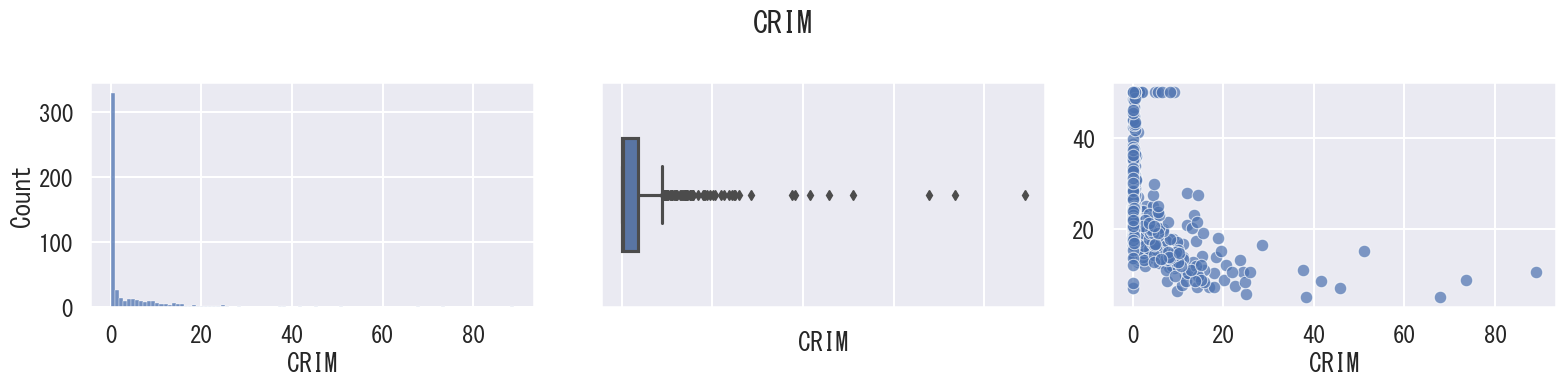

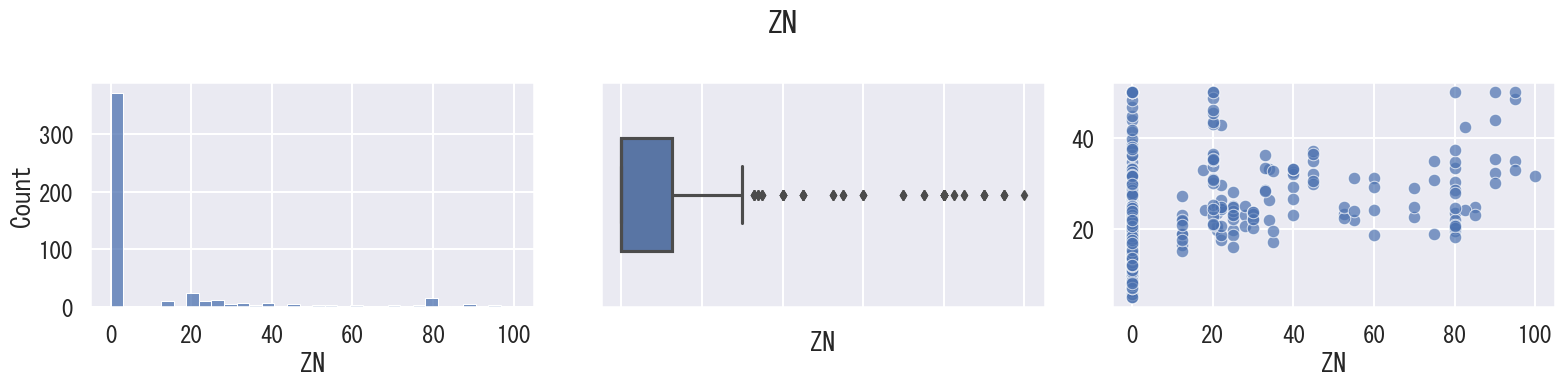

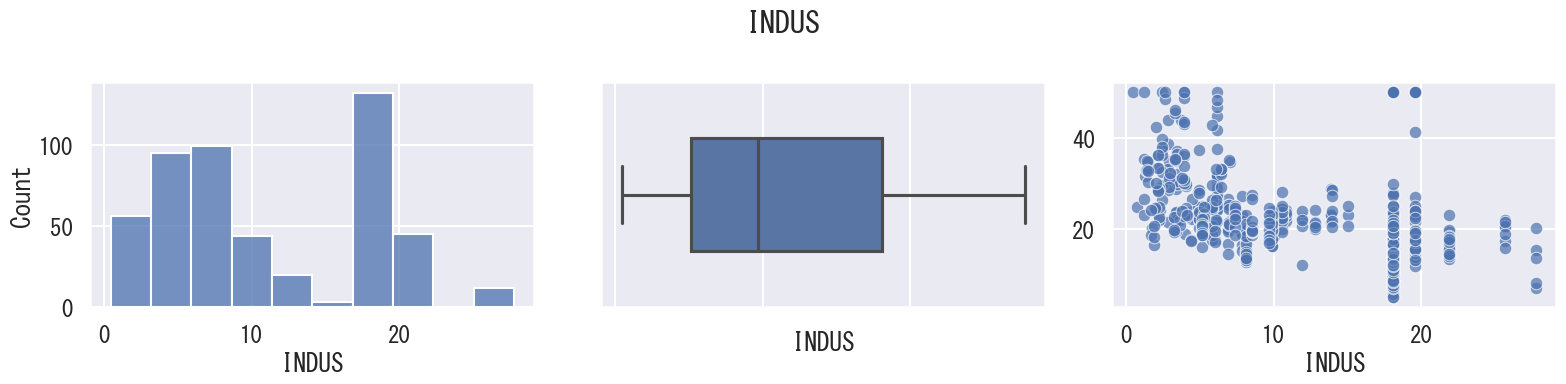

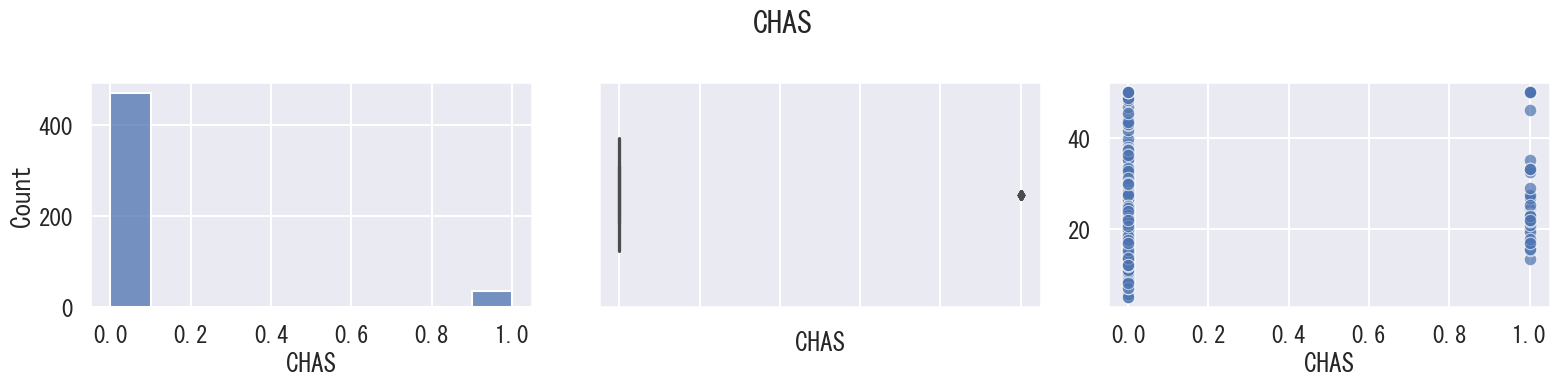

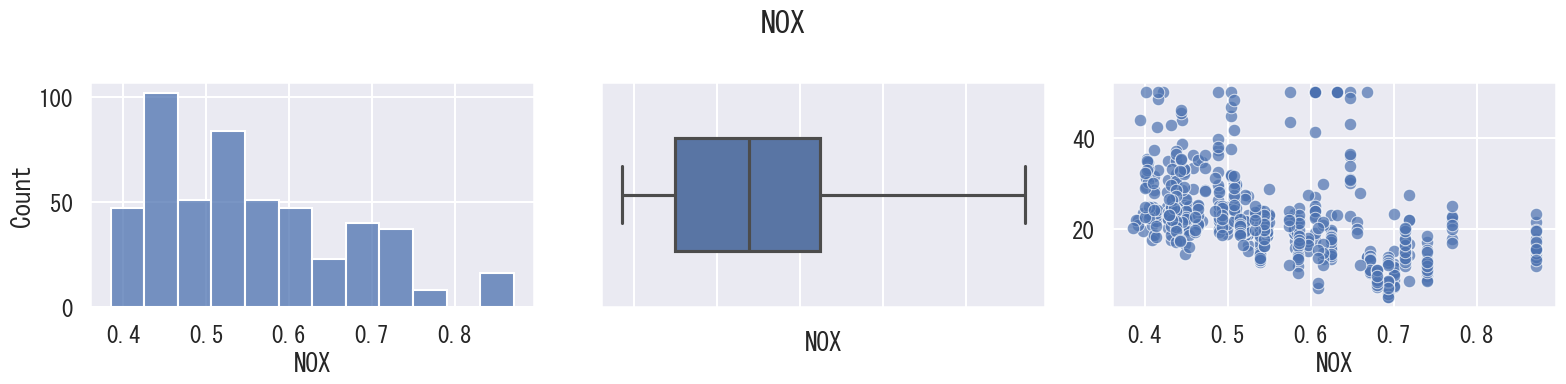

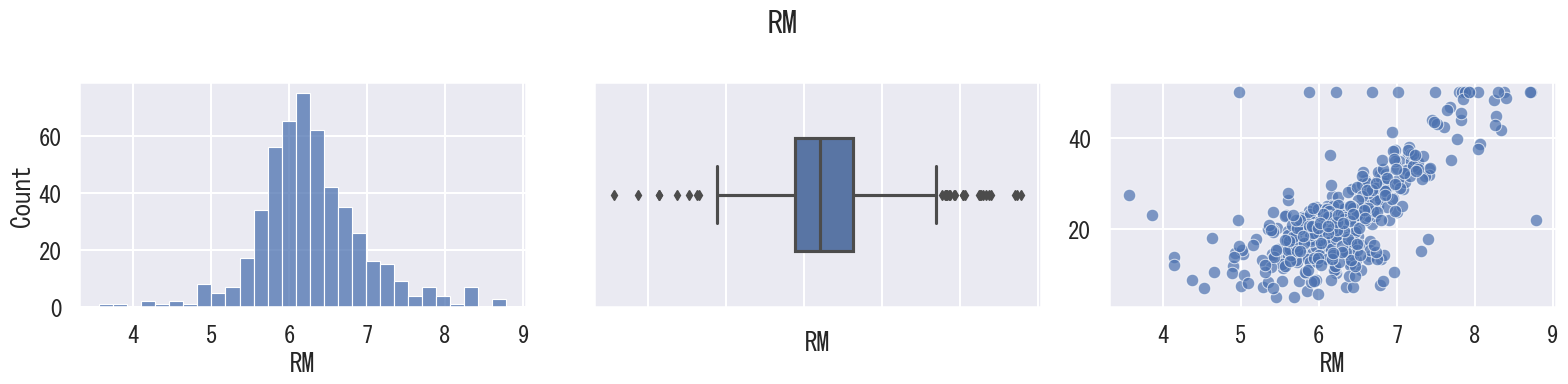

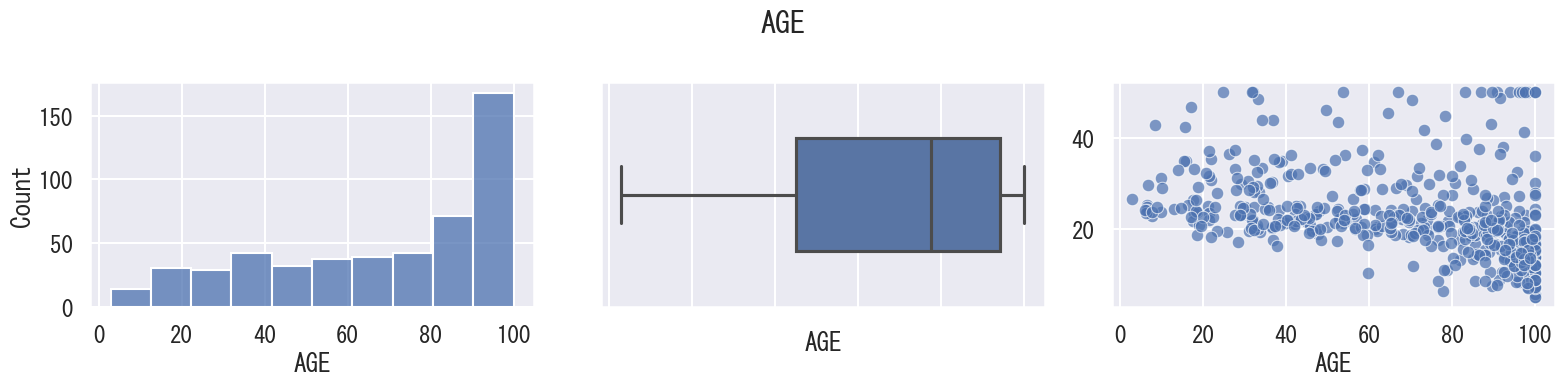

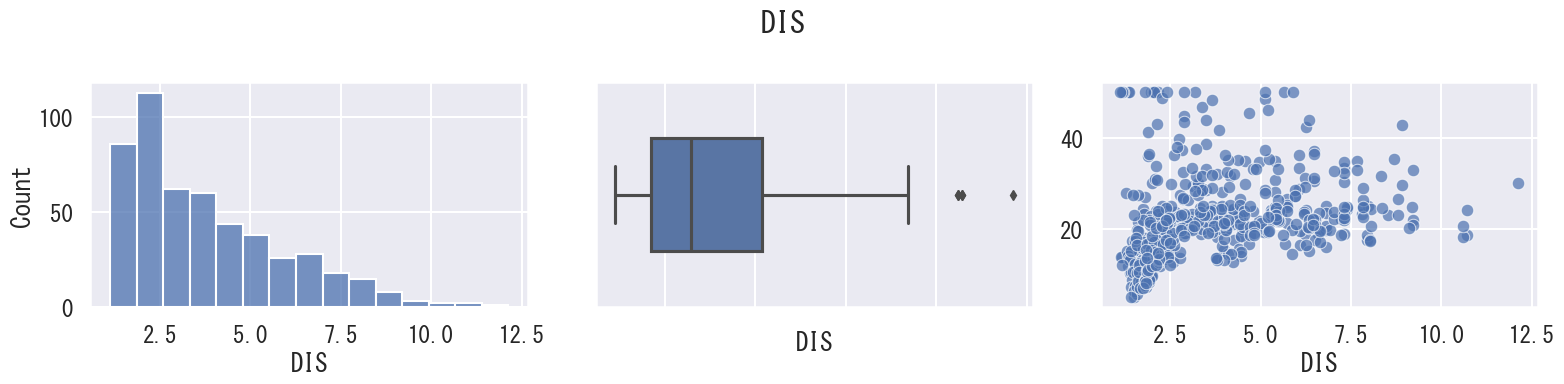

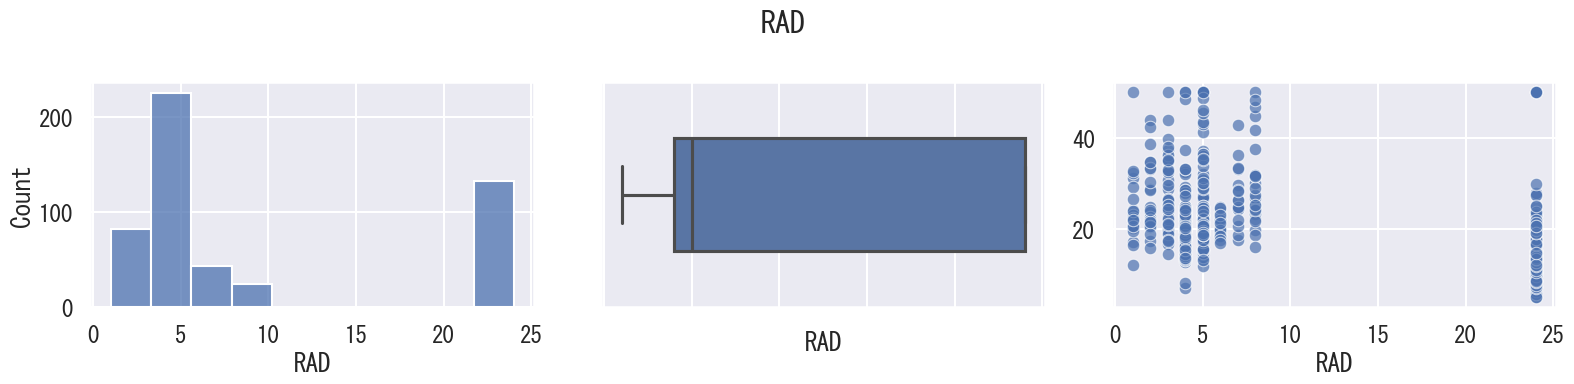

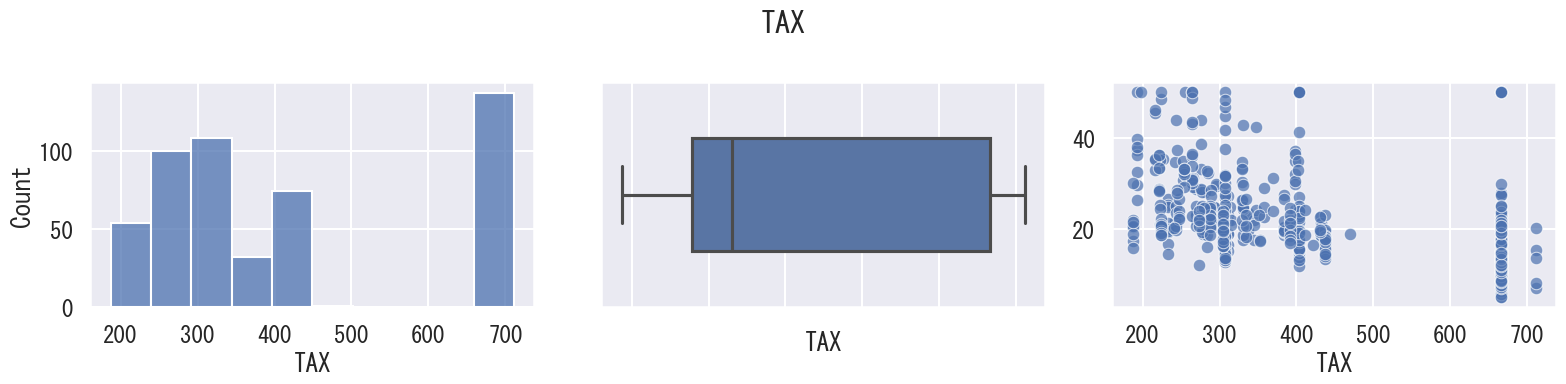

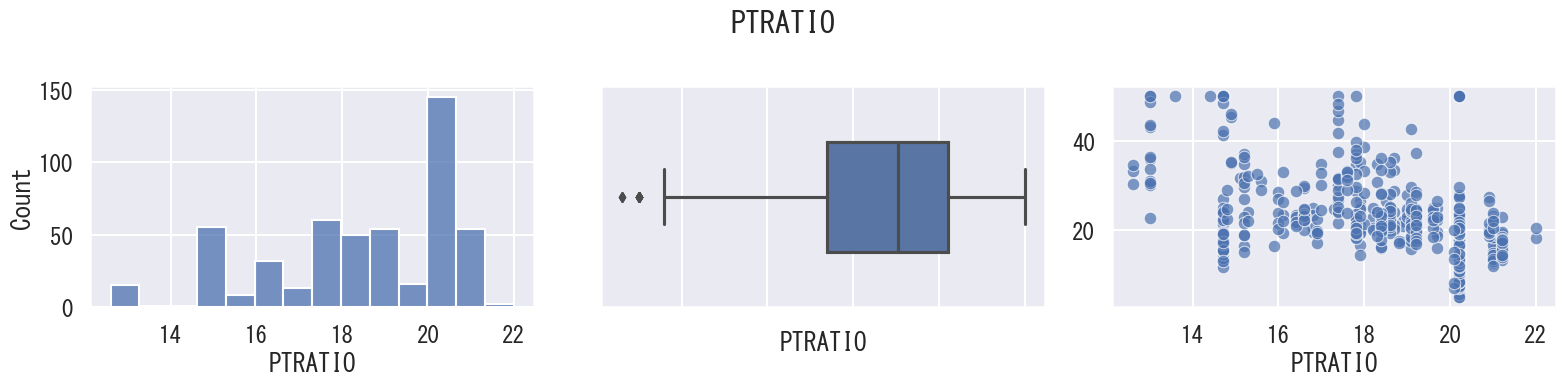

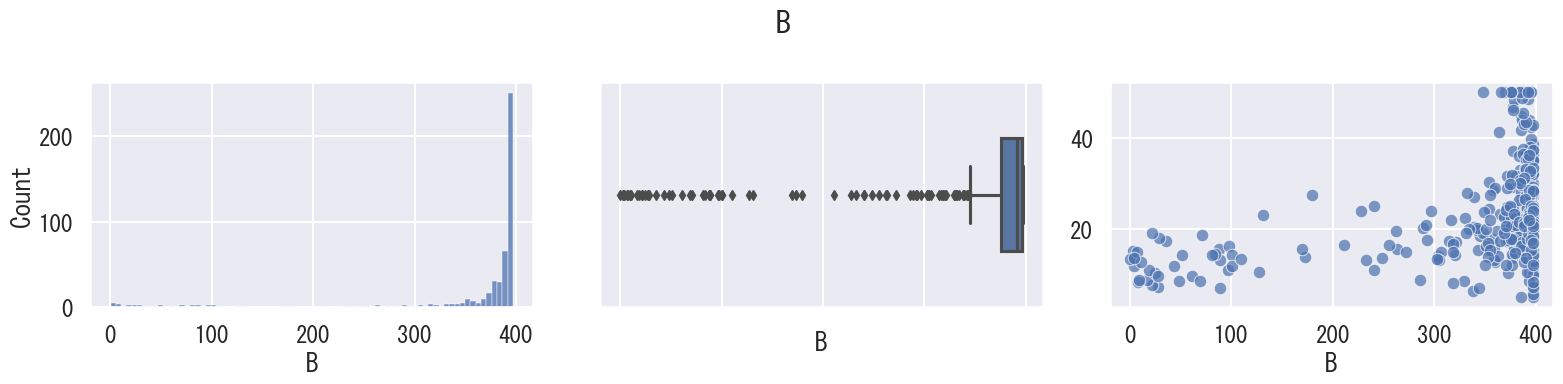

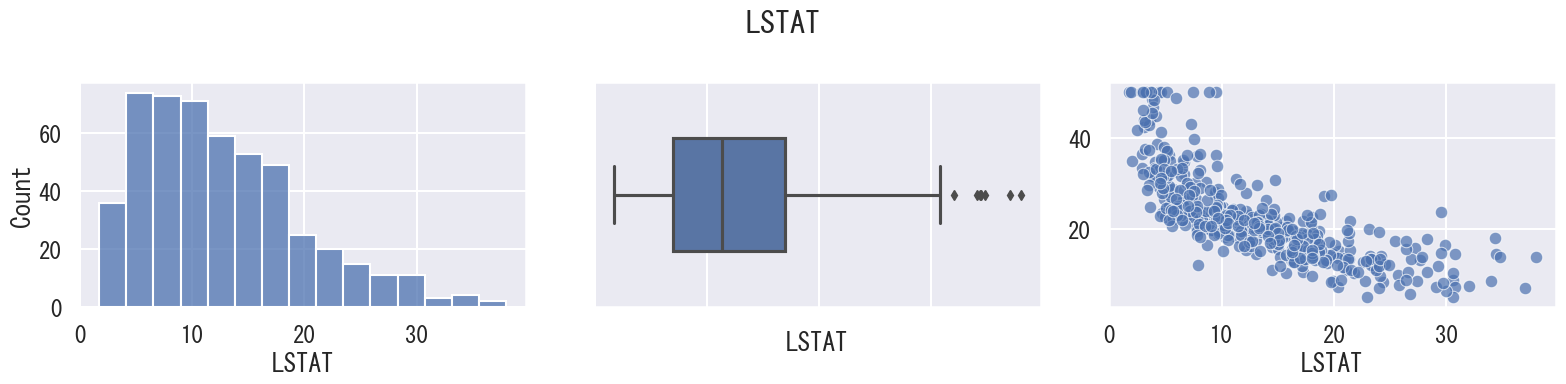

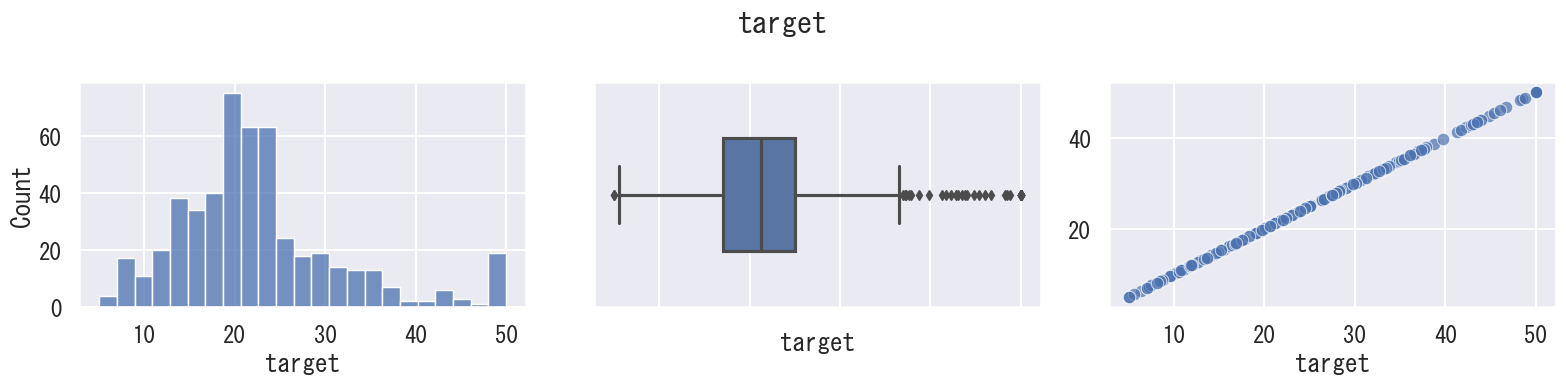

In [31]:
# 実行して表示
for feature in df.columns:
    plot_data(feature)

Exercise_4 : 外れ値に影響を受けにくいRobustScalerで説明変数をスケーリングを実行してください

In [ ]:
# 実行
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
X_scaled = 

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>X_scaled = scaler.fit_transform(X)</code>
</details>

In [ ]:
# 実行して表示
X_scaled[:3]

Exercise_5 : 本セクションで使った3つの回帰分析モデルをインポートし、モデルのインスタンスを作成してください

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>from sklearn.linear_model import LinearRegression</code><br>
    <code>from sklearn.ensemble import RandomForestRegressor</code><br>
    <code>from sklearn.neighbors import KNeighborsRegressor</code>
</details>

In [ ]:
lr_model = 
rf_model = 
kn_model = 

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>lr_model = LinearRegression()</code><br>
    <code>rf_model = RandomForestRegressor()</code><br>
    <code>kn_model = KNeighborsRegressor()</code>
</details>

In [ ]:
# 実行
models = [lr_model, rf_model, kn_model]

In [ ]:
# 実行
from sklearn.model_selection import train_test_split

Exercise_6 :train_test_splitを用いてX_scaled、yからトレインデータ、テストデータを作成して下さい。その際の分割を7：3、ランダムステートを17に指定してください

In [ ]:
X_train, X_test, y_train, y_test = 

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=17)</code>
</details>

Exercise_7 : lr_modelを使い、上記のデータセットのX_testに対する予測を行ってください。

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>lr_model.fit(X_train, y_train)</code>
</details>

In [ ]:
pred = 

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>pred = lr_model.predict(X_test)</code>
</details>

In [ ]:
# 実行して表示
pred[:3]

In [ ]:
# 実行して表示。ｙの最小、最大からその範囲を確認しておく
y.min(), y.max()

In [ ]:
# 実行して表示
plt.figure(figsize=(16, 6))
sns.scatterplot(data=y_test - pred,  color='#0c0')
plt.axhline(0, color='#f00')
plt.show()

In [ ]:
# 実行
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

Exercise_8 : 下記のスコアを算出してください

In [ ]:
r2 = np.round(, 4)
mae = np.round(, 4)
mse = np.round(, 4)
mape = np.round(, 4)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>r2_score(y_test, pred)</code><br>
    <code>mean_absolute_error(y_test, pred)</code><br>
    <code>mean_squared_error(y_test, pred)</code><br>
    <code>mean_absolute_percentage_error(y_test, pred)</code>
</details>

In [ ]:
# 実行して表示
print(f'r2 : {r2}, mae : {mae}, mse : {mse}, mape : {mape}')

Exercise_9 : lr_modelの係数、切片を表示して下さい

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>lr_model.coef_</code>
</details>

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>lr_model.intercept_</code>
</details>

In [ ]:
# 実行
from sklearn.model_selection import KFold, cross_val_score

Exercise_10 : KFoldの分割数を5、シャッフル、、ランダムステートを17として下記の k を作成してください

In [ ]:
k = 

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>k = KFold(5, shuffle=True, random_state=17)</code>
</details>

Exercise_11 : k, X, yを用いて下記のforループを完成させ、スコアの平均値をプリントしてください

In [ ]:
for model in models:
    scores =   #
    print(f'{model} : {}')   # 
    print('\n')

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>scores = cross_val_score(model, X, y, cv=k) </code><br>
    <code>scores.mean()</code>
</details>

Exercise_12 : k, X_scaled, yを用いて下記のforループを完成させ、スコアの平均値をプリントしてください（cross_val_scoreを使用）。スケール前のスコアとの違いを確認してください

In [ ]:
for model in models:
    scores =    #
    print(f'{model} : {scores.mean()}')
    print('\n')

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>scores = cross_val_score(model, X_scaled, y, cv=k)</code><br>
</details>

In [ ]:
# 実行
from sklearn.model_selection import GridSearchCV

In [ ]:
# 実行
params = {
    'n_estimators':[140, 160],
    'max_depth':[18, 22],
    'max_features':[0.6, 0.9],
}

Exercise_13 : rf_modelに対して、上記の params と k を用いてグリッドサーチを実行してください(fitを行う)

In [ ]:
grid = 

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>grid = GridSearchCV(rf_model, param_grid=params, cv=k)</code><br>
</details>

In [ ]:
# X_scaledとyを使う


<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>grid.fit(X_scaled, y)</code><br>
</details>

Exercise_14 : 上記の結果を取得しデータフレームにしてください

In [ ]:
result = 

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>pd.DataFrame(grid.cv_results_)</code><br>
</details>

In [ ]:
# 実行して表示
result

Exercise_15 : 最良のパラメータを表示してください

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>grid.best_params_</code><br>
</details>

## 以上